In [49]:
# Dataset: paribas.csv, satandar.csv
# Location: https://mitu.com.in/dataset


In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [137]:
df = pd.read_csv('dataset/satandar.csv', nrows=40000)
df.shape

(40000, 371)

In [138]:
df.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [139]:
x = df.drop('TARGET', axis = 1) # x will save all features except TARGET
x.shape

(40000, 370)

In [140]:
z = np.array([6,5,4,3,6,7,8,9])

In [141]:
z.var()

3.5

In [142]:
np.mean((z - z.mean())**2)

3.5

In [143]:
z = np.zeros(8) + 5
z

array([5., 5., 5., 5., 5., 5., 5., 5.])

In [144]:
z.var()

0.0

##### Variance Threshold

In [145]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0)
vt.fit(x)

VarianceThreshold(threshold=0)

In [146]:
vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [147]:
sum(vt.get_support())

320

In [148]:
x_new = x.iloc[:, vt.get_support()] # Whose value are false they are getting removed
x_new.shape

(40000, 320)

##### Duplicated Feature Removal

In [149]:
x.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
39995    False
39996    False
39997    False
39998    False
39999    False
Length: 40000, dtype: bool

In [150]:
xt = x.T

In [151]:
xt.shape

(370, 40000)

In [152]:
xt.duplicated()

ID                         False
var3                       False
var15                      False
imp_ent_var16_ult1         False
imp_op_var39_comer_ult1    False
                           ...  
saldo_medio_var44_hace2    False
saldo_medio_var44_hace3    False
saldo_medio_var44_ult1     False
saldo_medio_var44_ult3     False
var38                      False
Length: 370, dtype: bool

In [153]:
sum(xt.duplicated())

79

In [154]:
xt.drop_duplicates(inplace=True)

In [155]:
x = xt.T
x.shape

(40000, 291)

##### Remove correlated Features

In [166]:
a = np.array([12,34,45,51,57,67,78,89,93,95])
b = np.array([5,9,11,16,23,31,37,51,44,50])
c = np.array([56,54,34,48,33,21,11,16,5,2,])
d = np.array([67,65,34,27,54,33,67,44,27,53])

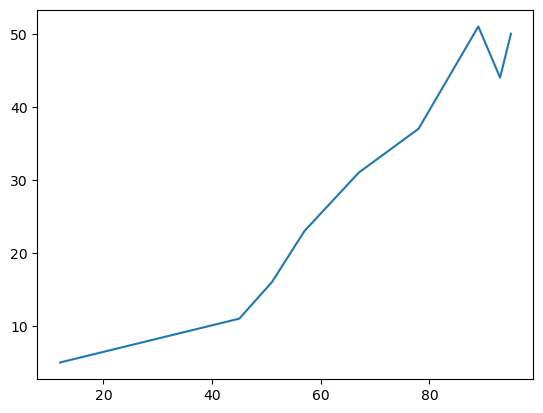

In [167]:
plt.plot(a,b)

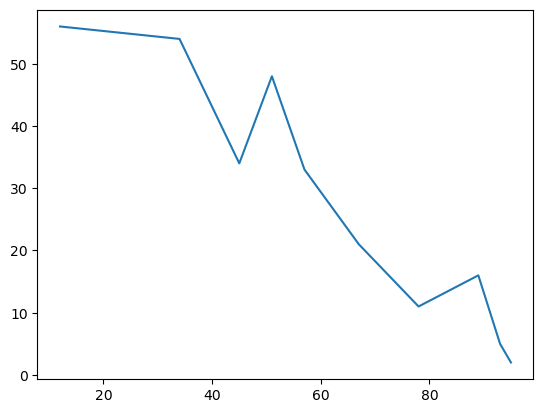

In [168]:
plt.plot(a,c)

In [169]:
np.corrcoef(a,c)

array([[ 1.       , -0.9457024],
       [-0.9457024,  1.       ]])

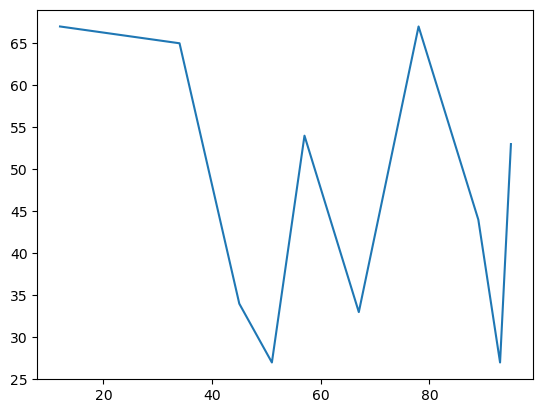

In [170]:
plt.plot(a,d)

In [171]:
np.corrcoef(a, d)

array([[ 1.        , -0.33616692],
       [-0.33616692,  1.        ]])

In [172]:
df = pdf.read_csv('dataset/paribas.csv', nrows=20000)


In [173]:
df.shape

(20000, 133)

In [174]:
x = df.drop('target', axis = 1)

In [175]:
x.shape

(20000, 132)

In [176]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 132 entries, ID to v131
dtypes: float64(108), int64(5), object(19)
memory usage: 20.1+ MB


In [177]:
cols = ['int64', 'float64']

In [178]:
numerical_columns = list(x.select_dtypes(include=cols).columns)

In [179]:
len(numerical_columns) 

113

In [180]:
x.shape

(20000, 132)

In [181]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 132 entries, ID to v131
dtypes: float64(108), int64(5), object(19)
memory usage: 20.1+ MB


In [211]:
correlated_features = set() # Setcontans oil separgte values only 
correlated_matrix = x.corr() # Create correlation matrix

In [212]:
correlated_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [213]:
# Column name will correlation > 80
for i in range(len(correlated_matrix.columns)):
    for j in range(i):
        if abs(correlated_matrix.iloc[i, j]) > 0.8:
            colname = correlated_matrix.columns[i]
            correlated_features.add(colname)

In [214]:
len(correlated_features)

17

In [215]:
x = x.drop(correlated_features, axis = 1)

In [216]:
x.shape

(569, 13)

##### CHi Technique

In [217]:
#Dataset : wisc_bc_data.vsc
# Location: https://mitu.co.in/dataset

In [218]:
df = pd.read_csv('dataset/wisc_bc_data.csv')

In [219]:
df.shape

(569, 32)

In [220]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [221]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [222]:
x = df.drop(['id','diagnosis'], axis = 1)

In [223]:
x.shape

(569, 30)

In [224]:
# Top 5 features


In [225]:
from sklearn.feature_selection import SelectKBest, chi2

In [226]:
skf = SelectKBest(k=5, score_func=chi2)

In [227]:
skf.fit(x,df['diagnosis'])

SelectKBest(k=5, score_func=<function chi2 at 0x0000023CA07985E0>)

In [228]:
skf.get_support()

array([False, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False])

In [229]:
x.iloc[:, skf.get_support()]

,perimeter_mean,area_mean,area_se,perimeter_worst,area_worst
0,122.80,1001.0,153.40,184.60,2019.0
1,132.90,1326.0,74.08,158.80,1956.0
2,130.00,1203.0,94.03,152.50,1709.0
3,77.58,386.1,27.23,98.87,567.7
4,135.10,1297.0,94.44,152.20,1575.0
...,...,...,...,...,...
564,142.00,1479.0,158.70,166.10,2027.0
565,131.20,1261.0,99.04,155.00,1731.0
566,108.30,858.1,48.55,126.70,1124.0
567,140.10,1265.0,86.22,184.60,1821.0
